# Zomato Dataset for EDA

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv(r'C:\Users\Shiv n\OneDrive\Desktop\py\Zomato dataset\Zomato.csv', encoding = 'unicode_escape')
ds.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
def ColumnsWithNulls(data):
    result = []
    for i in ds.columns:
        if ds[i].isnull().sum() > 0:
            result.append(i)
    return result

In [5]:
ColumnsWithNulls(ds)

['Cuisines']

In [176]:
ds2 = pd.read_excel(r'C:\Users\Shiv n\OneDrive\Desktop\py\Zomato dataset\Country-Code.xlsx')
ds2.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [7]:
df = pd.merge(ds, ds2, on = 'Country Code', how = 'left')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [11]:
TransPerCountry = df['Country'].value_counts()
TransPerCountry

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [12]:
CountryValue = df['Country'].value_counts().values
CountryValue

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [14]:
CountryNames = df['Country'].value_counts().index
CountryNames

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

([<matplotlib.patches.Wedge at 0x216ac52a3d0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

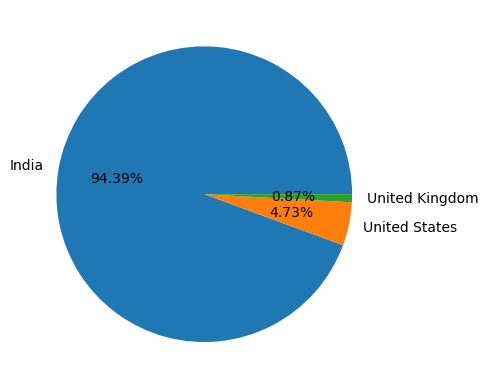

In [24]:
#Top 3 Countries that uses Zomato --Pie chart

graph = plt.pie(CountryValue[:3], labels = CountryNames[:3], autopct= '%1.2f%%')
graph

In [45]:
RD = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0:'Rating Count'})
R = RD.sort_values(by = 'Rating Count', ascending = False)
R.head(7)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
15,3.2,Orange,Average,522
14,3.1,Orange,Average,519
17,3.4,Orange,Average,498
16,3.3,Orange,Average,483
18,3.5,Yellow,Good,480
13,3.0,Orange,Average,468


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

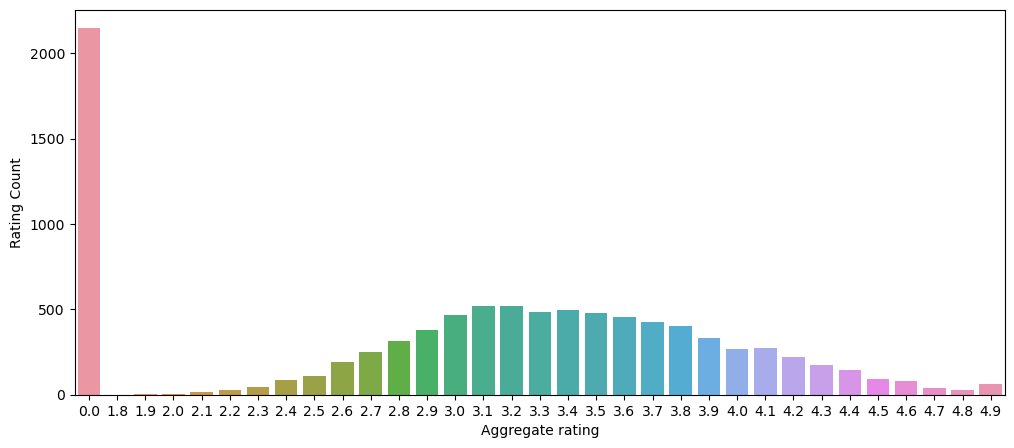

In [57]:
plt.figure(figsize = (12,5))

sns.barplot(x = 'Aggregate rating', y = 'Rating Count', data = R)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

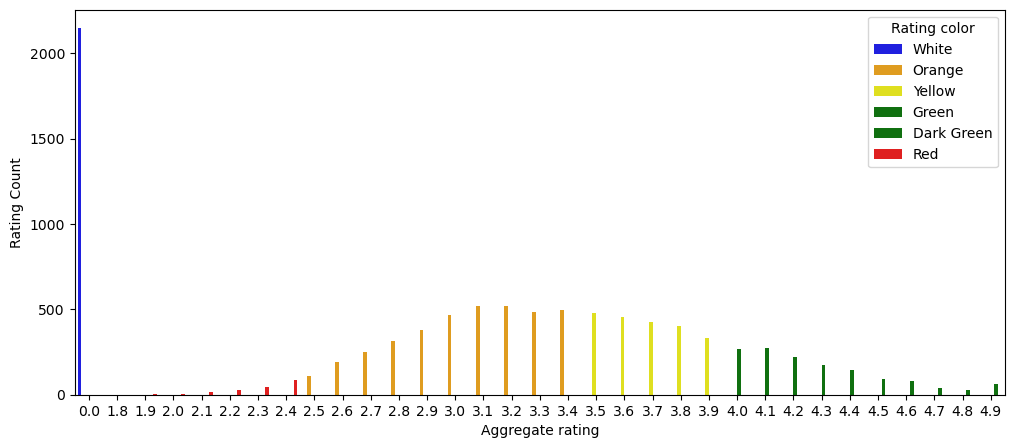

In [58]:
plt.figure(figsize = (12,5))

sns.barplot(x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color', data = R, palette= ['Blue', 'Orange', 'Yellow', 'Green', 'Green', 'Red'])

In [67]:
df.groupby(['Aggregate rating', 'Country']).size()

Aggregate rating  Country       
0.0               Brazil               5
                  India             2139
                  United Kingdom       1
                  United States        3
1.8               India                1
                                    ... 
4.9               Sri Lanka            1
                  Turkey               3
                  UAE                  4
                  United Kingdom       4
                  United States       14
Length: 222, dtype: int64

In [71]:
## Find the countries that has given 0 rating 

df[df['Aggregate rating'] == 0.0].groupby(['Aggregate rating', 'Country']).size().reset_index().rename(columns = {0 : 'Count'})

,Aggregate rating,Country,Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


In [89]:
# Find the currency used by countries

CC = df[['Country', 'Currency']].value_counts().index
CC

MultiIndex([(         'India',     'Indian Rupees(Rs.)'),
            ( 'United States',              'Dollar($)'),
            ('United Kingdom',             'Pounds(£)'),
            (        'Brazil',     'Brazilian Real(R$)'),
            (  'South Africa',                'Rand(R)'),
            (           'UAE',     'Emirati Diram(AED)'),
            (   'New Zealand',          'NewZealand($)'),
            (        'Turkey',       'Turkish Lira(TL)'),
            (     'Australia',              'Dollar($)'),
            (   'Phillipines',       'Botswana Pula(P)'),
            (     'Indonesia', 'Indonesian Rupiah(IDR)'),
            (         'Qatar',        'Qatari Rial(QR)'),
            (     'Singapore',              'Dollar($)'),
            (     'Sri Lanka',  'Sri Lankan Rupee(LKR)'),
            (        'Canada',              'Dollar($)')],
           names=['Country', 'Currency'])

In [98]:
# Which Country has the most Online delivery

df[df['Has Online delivery'] == 'Yes'].groupby(['Country']).size().reset_index().rename(columns = {0 : 'Count'})

,Country,Count
0,India,2423
1,UAE,28


In [122]:
#Top 5 Cities that uses Zomato --Pie chart

CityVal = df['City'].value_counts().values
CityVal

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

In [123]:
CityName = df['City'].value_counts().index
CityName

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

([<matplotlib.patches.Wedge at 0x216bd4f7890>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.9%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.1%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.6%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.2%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.3%')])

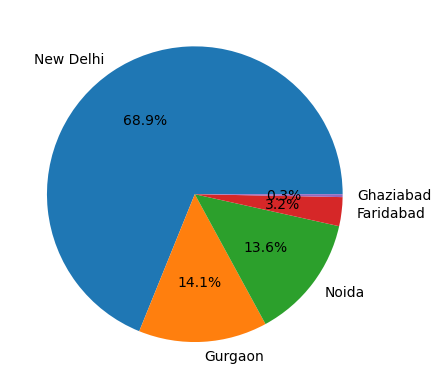

In [127]:
#Top 5 Cities that uses Zomato --Pie chart

plt.pie(CityVal[:5], labels = CityName[:5], autopct = '%1.1f%%')

In [144]:
# Find the top 10 cuisines

CuisineVal = df['Cuisines'].value_counts().head(10).reset_index()
CuisineVal

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


In [145]:
CuisineVal = df['Cuisines'].value_counts().head(10).values
CuisineVal

array([936, 511, 354, 354, 334, 299, 218, 197, 170, 149], dtype=int64)

In [148]:
CuisineName = df['Cuisines'].value_counts().head(10).index
CuisineName

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object', name='Cuisines')

([<matplotlib.patches.Wedge at 0x216b7cc9110>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.6%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.5%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.1%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.1%'),
  Text(-0.32377027935326874, -0.5051463215816842

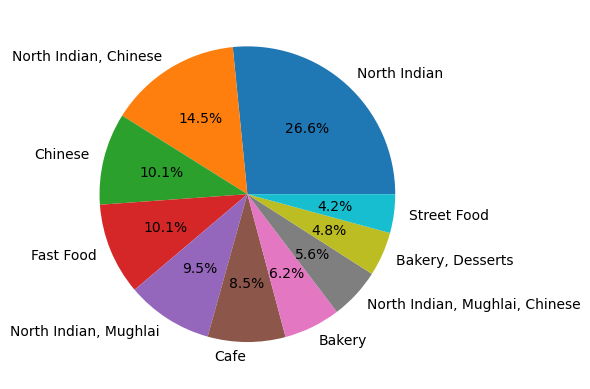

In [150]:
plt.pie(CuisineVal, labels = CuisineName, autopct = '%1.1f%%')

# Black Friday Dataset For EDA & Feature Engineering


Problem Statement ::>
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [45]:
df_train = pd.read_csv(r'C:\Users\Shiv n\OneDrive\Desktop\py\Black Friday Dataset\train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
df_test = pd.read_csv(r'C:\Users\Shiv n\OneDrive\Desktop\py\Black Friday Dataset\test.csv')
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [47]:
df = pd.concat([df_train, df_test])
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [48]:
df.count()

User_ID                       783667
Product_ID                    783667
Gender                        783667
Age                           783667
Occupation                    783667
City_Category                 783667
Stay_In_Current_City_Years    783667
Marital_Status                783667
Product_Category_1            783667
Product_Category_2            537685
Product_Category_3            237858
Purchase                      550068
dtype: int64

# Categorical data often come in the form of categories that do not have a numerical value. we have to transform categorical data into a numerical format that can be used by machine learning algorithms.

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Age'] = le.fit_transform(df['Age'])
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [51]:
df_city = pd.get_dummies(df['City_Category'])
df_city.head()

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [52]:
df_city = df_city.astype(int)
df_city.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [53]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [231]:
# when you try to concatenate DataFrames with non-unique index values you will get an error 
# To resolve this, you can reset the index of both DataFrames before concatenating them.
# you should drop the original 'City_Category' column before concatenating the one-hot encoded columns, 
# ensuring that you don't end up with duplicate columns.

In [54]:
df = df.reset_index(drop=True)
df_city = df_city.reset_index(drop=True)

df = df.drop(['City_Category'], axis = 1)

In [55]:
df = pd.concat([df, df_city], axis = 1)
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,NaN,NaN,7969.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,4,1,8,NaN,NaN,NaN,0,1,0
783663,1006036,P00254642,0,2,15,4,1,5,8.0,NaN,NaN,0,1,0
783664,1006036,P00031842,0,2,15,4,1,1,5.0,12.0,NaN,0,1,0
783665,1006037,P00124742,0,4,1,4,0,10,16.0,NaN,NaN,0,0,1


In [56]:
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)      # axis = 1 (columns) & axis = 0 (rows)   

In [57]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

** NULL of both Product_Category_2 & Product_Category_3 is going to get replcaed by the number which has the maximum occurrence or most frequent (MODE) 

** Purchase column is having the TEST data which has to be calculated based on TRAIN data in order to predict

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   A                           783667 non-null  int32  
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(3), object(3)
memory usage: 62.8+ MB


In [58]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Stay_In_Current_City_Years'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 783667 entries, 0 to 783666
Series name: Stay_In_Current_City_Years
Non-Null Count   Dtype
--------------   -----
783667 non-null  int32
dtypes: int32(1)
memory usage: 3.0 MB


In [59]:
M = df['Product_Category_2'].mode()[0]
M

8.0

In [60]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(M)

df['Product_Category_2'].isnull().sum()

0

In [61]:
M2 = df['Product_Category_3'].mode()[0]
M2

16.0

In [62]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(M2)

df['Product_Category_3'].isnull().sum()

0

In [63]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [64]:
df_test = df[df['Purchase'].isnull()]
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
550068,1,4,7,2,1,1,11.0,16.0,NaN,0,1,0
550069,1,2,17,0,0,3,5.0,16.0,NaN,0,0,1
550070,0,3,1,4,1,5,14.0,16.0,NaN,0,1,0
550071,0,3,1,4,1,4,9.0,16.0,NaN,0,1,0
550072,0,2,1,1,0,4,5.0,12.0,NaN,0,0,1


In [65]:
len(df_test)

233599

In [66]:
df_train = df[~df['Purchase'].isnull()]
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [67]:
len(df_train)

550068

In [68]:
y = df_train['Purchase']
y                           #to get the only purchase column

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [26]:
y.shape

(550068,)

In [69]:
x = df_train.drop(['Purchase'], axis = 1)      #to get every column except purchase     
x.shape

(550068, 11)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [71]:
X_train          # entire columns except purchase

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
178247,1,5,7,3,1,1,15.0,16.0,0,1,0
196647,1,1,12,4,0,5,8.0,16.0,0,0,1
418590,1,2,5,1,0,8,14.0,17.0,0,1,0
408727,1,1,4,2,0,8,8.0,16.0,0,1,0
216416,1,1,4,1,0,1,8.0,16.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
110268,1,4,17,2,0,5,8.0,16.0,0,0,1
259178,1,2,14,2,1,5,8.0,16.0,0,0,1
365838,0,1,1,1,0,5,8.0,16.0,0,1,0
131932,0,1,4,2,0,8,14.0,16.0,0,1,0


In [30]:
len(y_train)           # Only purchase

440054

# First, we have to train our model by using both of train_dataset X & y
# after that, we have implement this on test_dataset


In [72]:
## feature Scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [74]:
 lr.predict(X_test)

array([11800.19605881, 10447.49872977,  7403.49872977, ...,
        8051.49872977,  6779.49872977,  9187.49872977])

In [75]:
lr.score(X_test, y_test)

0.13035841629810507

Here's the accuracy of prediction by using LinearRegression algorithm is 13% which is too less..we have to try another algorithm

In [97]:
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state = 0)  

In [98]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [101]:
pred = regressor.predict(X_test)
pred

array([15623.        ,  3868.        ,  5706.71428571, ...,
        6966.64285714,  3176.5       ,  9503.53333333])

In [100]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_test, pred)


0.5646124417217245

Here's the accuracy of prediction by using DecisionTreeRegressor Algorithm is 56% which is not so good..we have to try another algorithm